In [135]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

from pathlib import Path

In [38]:
dataDir='/Users/deepakduggirala/Documents'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [39]:
annFile

'/Users/deepakduggirala/Documents/annotations/instances_train2017.json'

In [40]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.04s)
creating index...
index created!


In [41]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [42]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO supercategories: 
animal person indoor electronic accessory kitchen sports vehicle furniture appliance food outdoor


In [261]:
catIds = coco.getCatIds(catNms=['cow'])

In [50]:
coco.getCatIds?

Signature: coco.getCatIds(catNms=[], supNms=[], catIds=[])
Docstring:
filtering parameters. default skips that filter.
:param catNms (str array)  : get cats for given cat names
:param supNms (str array)  : get cats for given supercategory names
:param catIds (int array)  : get cats for given cat ids
:return: ids (int array)   : integer array of cat ids
File:      ~/miniforge3/envs/dl/lib/python3.9/site-packages/pycocotools/coco.py
Type:      method


In [262]:
catIds

[21]

In [197]:
animalCatIds = coco.getCatIds(supNms=['animal'])

In [263]:
imgIds = coco.getImgIds(catIds=catIds );

In [59]:
coco.getImgIds?

Signature: coco.getImgIds(imgIds=[], catIds=[])
Docstring:
Get img ids that satisfy given filter conditions.
:param imgIds (int array) : get imgs for given ids
:param catIds (int array) : get imgs with all given cats
:return: ids (int array)  : integer array of img ids
File:      ~/miniforge3/envs/dl/lib/python3.9/site-packages/pycocotools/coco.py
Type:      method


In [267]:
len(imgIds)

1968

In [270]:
# imgIds

In [271]:
imgIds[0:1]

[573455]

In [272]:
coco.loadImgs(ids=[573455])

[{'license': 6,
  'file_name': '000000573455.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000573455.jpg',
  'height': 383,
  'width': 640,
  'date_captured': '2013-11-18 00:44:15',
  'flickr_url': 'http://farm5.staticflickr.com/4126/5093362617_383c2b3276_z.jpg',
  'id': 573455}]

In [241]:
img = coco.loadImgs(ids=imgIds[0:10])[2]

In [239]:
img

{'license': 4,
 'file_name': '000000213010.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000213010.jpg',
 'height': 500,
 'width': 500,
 'date_captured': '2013-11-17 19:23:57',
 'flickr_url': 'http://farm2.staticflickr.com/1307/538287430_9dc1b70440_z.jpg',
 'id': 213010}

In [68]:
coco.loadImgs?

Signature: coco.loadImgs(ids=[])
Docstring:
Load anns with the specified ids.
:param ids (int array)       : integer ids specifying img
:return: imgs (object array) : loaded img objects
File:      ~/miniforge3/envs/dl/lib/python3.9/site-packages/pycocotools/coco.py
Type:      method


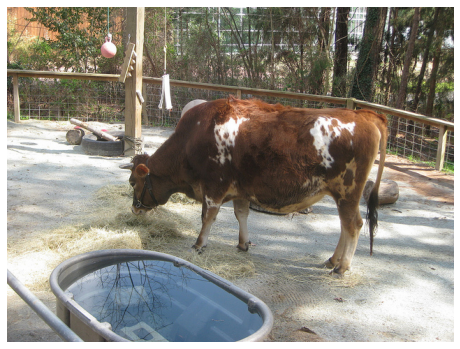

In [242]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

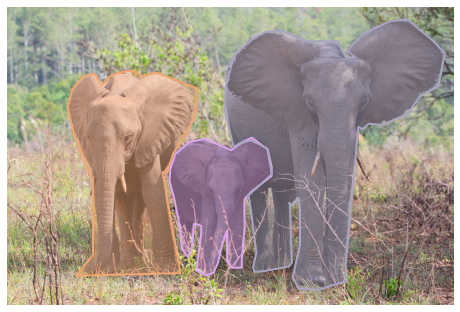

In [95]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [97]:
len(anns)

3

In [98]:
x,y,w,h = anns[0]['bbox']

In [86]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_bounding_box(img, boxes, labels=None, normalized=True):
    if labels is None:
        labels = ['box-'+str(i) for i in range(1, len(boxes)+1)]
    plt.figure(figsize=(16, 10))
    plt.imshow(img)
    ax = plt.gca()

    H, W = img.shape[:2]

    for i, (box, label) in enumerate(zip(boxes, labels)):
        if normalized:
            ymin, xmin, ymax, xmax = np.array(box) * [H, W, H, W]
        else:
            ymin, xmin, ymax, xmax = box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=COLORS[i % len(COLORS)], linewidth=3))
        ax.text(xmin, ymin, label, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))

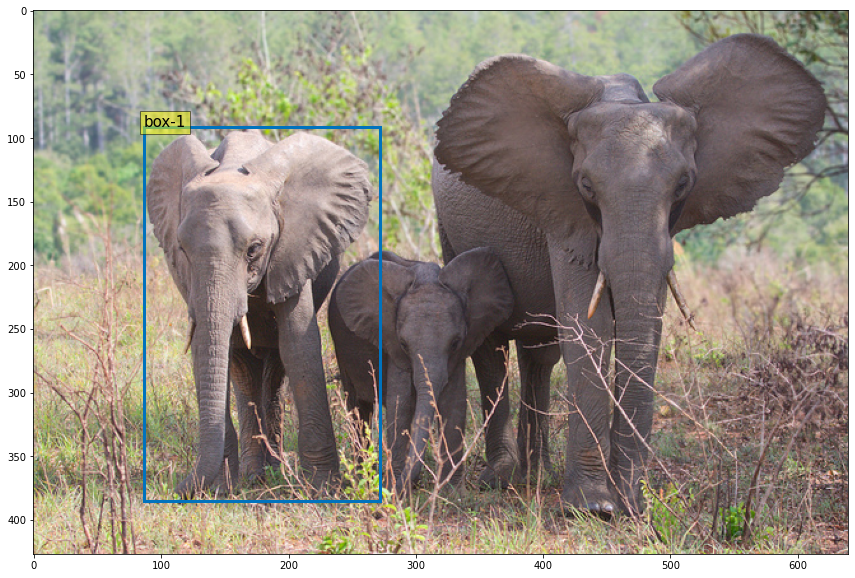

In [99]:
box=[y,x,y+h, x+w]
plot_bounding_box(img=I, boxes=[box], labels=None, normalized=False)

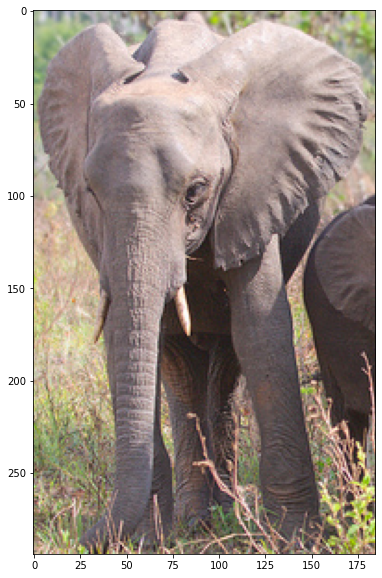

In [100]:
plt.imshow(I[int(y):int(y+h),int(x):int(x+w)])

In [117]:
catIds=[22]
imgIds = coco.getImgIds(catIds=catIds )
imgs = coco.loadImgs(ids=imgIds)

In [193]:
data_dir = '/Users/deepakduggirala/Documents/coco-dataset/train/elephants'

In [191]:
def is_valid_bbox(bbox, area_thresh=150*150, aspect_thresh=1.5):
    x,y,w,h = bbox
    return w*h >= area_thresh and max(w,h)/min(w,h) <= aspect_thresh

def fetch_and_save(img, data_dir, catIds, area_thresh=128*128):
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    valid_anns = [ann for ann in anns if is_valid_bbox(ann['bbox'])]
    
    if len(valid_anns) > 0:
        I = io.imread(img['coco_url'])
    
        for i,ann in enumerate(valid_anns):
            x,y,w,h = bbox = ann['bbox']
            crop = I[int(y):int(y+h),int(x):int(x+w)]
            out_file = Path(data_dir) / f"{img['id']}_{i}.png"
            io.imsave(out_file, crop)

In [195]:
fetch_and_save(imgs[1], data_dir, catIds)

In [202]:
imgIds = coco.getImgIds(catIds=22)

In [213]:

imgs = []
for catId in [23, 24, 25]:
    imgIds = coco.getImgIds(catIds=catId)
    print(len(imgIds), catId)
    imgs.extend(coco.loadImgs(ids=imgIds))

960 23
1916 24
2546 25


bird cat dog horse sheep cow elephant bear zebra giraffe

In [253]:
imgIds = coco.getImgIds(catIds=[22,16])
len(imgIds)

73